# FUS Images Preprocessing

In [1]:
%pip install nibabel matplotlib

DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/monai-1.2.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/generative-0.2.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image

In [3]:
# Directory containing the NIfTI images
directory_path = "../../raw_data/Rat_Astromod/fUS/Resting"

# List all files in the directory
file_list = os.listdir(directory_path)

# Criteria of images selection 
keyword = "_01_"

# Filter only NIfTI files (assuming they have the ".nii" extension)
nii_files = [file for file in file_list if keyword in file and file.endswith(".nii") and "R1a-1497_01_rest" not in file] # - The excluded image present an anomaly

# Create an empty list to store the images
nii_images = []

# Loop through the NIfTI files and display them
for nii_file in nii_files:
    nii_image_path = os.path.join(directory_path, nii_file)

    # Load the NIfTI image
    img = nib.load(nii_image_path)

    # Append the loaded image to the list
    nii_images.append({"image" : img, "title" : nii_file})
    

print(f"the number of the images  : {len(nii_images)}")
print("Image Dimensions : ", nii_images[0]["image"].shape)
print("Voxel Dimensions (mm): ", nii_images[0]["image"].header.get_data_dtype())

the number of the images  : 34
Image Dimensions :  (112, 128, 3000)
Voxel Dimensions (mm):  float64


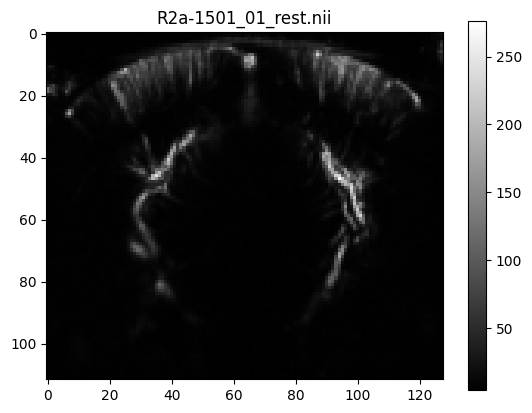

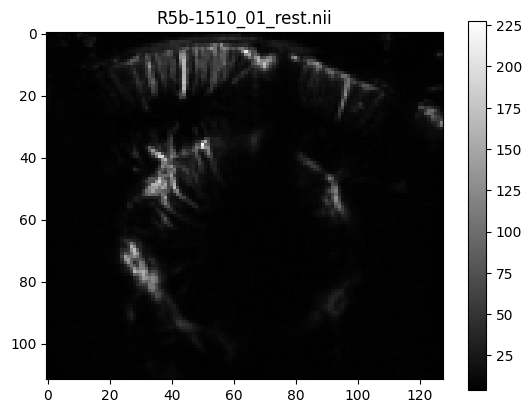

In [4]:
for data_index in range(2):
    # Get the image data
    img= nii_images[data_index]["image"].get_fdata()
    
    # Display the image 
    plt.imshow(img[:,:,0], cmap='gray')  # Replace "slice_number" with the desired slice
    plt.title(nii_images[data_index]["title"])
    plt.colorbar()  # Add a colorbar (optional)
    plt.show()

## Preprocessing fUS Images

We consider only fUS Rats images in a resting state, witout visual simulation. The second simulation is then followed by a generation of the corresponding ULM image. We reduce the number of slices by averaging them. The number of fUS slices per ULM image we want to have is fixed in ’total_groups’ variable  

In [5]:
# Specify the desired number of groups
total_groups = 30

# Calculate the number of slices per group
slices_per_group = nii_images[0]["image"].shape[-1] // total_groups

nii_images_transformed = []

# Create a figure for displaying slices and mean
#plt.figure(figsize=(15, 5))

# Transform all the images
for data in nii_images:
    # Get the image data
    img = data["image"].get_fdata()
    
    # Initialize an empty array to store the result
    result_img = np.empty((img.shape[0], img.shape[1], total_groups))


    # Calculate the mean for every 100 slices
    for group in range(total_groups):
        start_slice = group * slices_per_group
        end_slice = (group + 1) * slices_per_group
        group_data = img[:, :, start_slice:end_slice]
        group_mean = np.mean(group_data, axis=-1)
        result_img[:, :, group] = group_mean

        # Display individual slices
        #plt.subplot(2, total_groups, group + 1)
        #plt.imshow(group_data[:, :, 0], cmap='gray')
        #plt.title(f"Slice {start_slice}")

        # Display the mean image
        #plt.subplot(2, total_groups, total_groups + group + 1)
        #plt.imshow(group_mean, cmap='gray')
        #plt.title(f"Mean Group {group + 1}")

    # Show the plot with individual slices and mean images
    #plt.tight_layout()
    #plt.show()

    nii_images_transformed.append({"image" : result_img, "title" : data["title"]})
    #print(data["title"], " : ", img.shape , " / resulting : ", result_img.shape)

In [6]:
# Normalize the data to the range [0, 255] for grayscale mapping
RGB_format_images = []

for data in nii_images_transformed:
    normalized_image = ((data["image"] - data["image"].min()) / (data["image"].max() - data["image"].min())* 255).astype(np.uint8)

    RGB_format_images.append({"image" : normalized_image, "title" : data["title"]})

In [7]:
# Create a new directory to store the preprocessed data
new_sub_dir =  Path("../../data/fUS")
new_sub_dir.mkdir(parents=True, exist_ok=True)

# Iterate over the images to store them 
for data in RGB_format_images:

    for i in range(data["image"].shape[-1]):

        image_slice = Image.fromarray(data["image"][:, :, i])
        
        image_path = data["title"].replace('.nii',f'_slice-{i}_fUS.png') 
            
        new_image_path = new_sub_dir / image_path
        
        print(new_image_path)
        
        image_slice.save(new_image_path)

../data/fUS/R2a-1501_01_rest_slice-0_fUS.png
../data/fUS/R2a-1501_01_rest_slice-1_fUS.png
../data/fUS/R2a-1501_01_rest_slice-2_fUS.png
../data/fUS/R2a-1501_01_rest_slice-3_fUS.png
../data/fUS/R2a-1501_01_rest_slice-4_fUS.png
../data/fUS/R2a-1501_01_rest_slice-5_fUS.png
../data/fUS/R2a-1501_01_rest_slice-6_fUS.png
../data/fUS/R2a-1501_01_rest_slice-7_fUS.png
../data/fUS/R2a-1501_01_rest_slice-8_fUS.png
../data/fUS/R2a-1501_01_rest_slice-9_fUS.png
../data/fUS/R2a-1501_01_rest_slice-10_fUS.png
../data/fUS/R2a-1501_01_rest_slice-11_fUS.png
../data/fUS/R2a-1501_01_rest_slice-12_fUS.png
../data/fUS/R2a-1501_01_rest_slice-13_fUS.png
../data/fUS/R2a-1501_01_rest_slice-14_fUS.png
../data/fUS/R2a-1501_01_rest_slice-15_fUS.png
../data/fUS/R2a-1501_01_rest_slice-16_fUS.png
../data/fUS/R2a-1501_01_rest_slice-17_fUS.png
../data/fUS/R2a-1501_01_rest_slice-18_fUS.png
../data/fUS/R2a-1501_01_rest_slice-19_fUS.png
../data/fUS/R2a-1501_01_rest_slice-20_fUS.png
../data/fUS/R2a-1501_01_rest_slice-21_fUS.pn